# Classification on CIFAR 10 Dataset

Instructions - 
1. In order to kick start, code for setting up the dataframes has already been given (Step 1 to 5)
2. Go through the entire code written below and put the relavent comment for each line of code. Understanding below mentioned code is very important.
3. After commenting the code in step 1 to 5, complete step 6 and 7

## Step - 1 (Setup Code)

In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Step - 2 (Download the dataset)

In [6]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'


!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz ./cifar-10-batches-py/
!tar -xzvf cifar-10-python.tar.gz ./cifar-10-batches-py/
#!del cifar-10-python.tar.gz

A subdirectory or file cifar-10-batches-py already exists.
--2021-11-24 19:12:03--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 64:ff9b::8064:31e, 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|64:ff9b::8064:31e|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: 'cifar-10-python.tar.gz'

     0K .......... .......... .......... .......... ..........  0% 78.1K 35m30s
    50K .......... .......... .......... .......... ..........  0%  151K 26m54s
   100K .......... .......... .......... .......... ..........  0%  207K 22m24s
   150K .......... .......... .......... .......... ..........  0%  349K 18m47s
   200K .......... .......... .......... .......... ..........  0%  231K 17m25s
   250K .......... .......... .......... .......... ..........  0%  327K 15m56s
   300K .......... .......... .......... .......... ..........  0%  220K 15m

 17100K .......... .......... .......... .......... .......... 10% 2.99M 4m20s
 17150K .......... .......... .......... .......... .......... 10% 1.87M 4m19s
 17200K .......... .......... .......... .......... .......... 10% 80.7M 4m18s
 17250K .......... .......... .......... .......... .......... 10%  100M 4m17s
 17300K .......... .......... .......... .......... .......... 10%  102M 4m17s
 17350K .......... .......... .......... .......... .......... 10% 1.16M 4m16s
 17400K .......... .......... .......... .......... .......... 10%  397K 4m16s
 17450K .......... .......... .......... .......... .......... 10%  395K 4m17s
 17500K .......... .......... .......... .......... .......... 10%  366K 4m17s
 17550K .......... .......... .......... .......... .......... 10%  323K 4m17s
 17600K .......... .......... .......... .......... .......... 10%  352K 4m18s
 17650K .......... .......... .......... .......... .......... 10%  306K 4m18s
 17700K .......... .......... .......... .......... 

 23300K .......... .......... .......... .......... .......... 14% 1.17M 3m57s
 23350K .......... .......... .......... .......... .......... 14% 1.28M 3m57s
 23400K .......... .......... .......... .......... .......... 14%  566K 3m56s
 23450K .......... .......... .......... .......... .......... 14%  925K 3m56s
 23500K .......... .......... .......... .......... .......... 14%  677K 3m56s
 23550K .......... .......... .......... .......... .......... 14% 1.23M 3m56s
 23600K .......... .......... .......... .......... .......... 14% 1.09M 3m55s
 23650K .......... .......... .......... .......... .......... 14%  805K 3m55s
 23700K .......... .......... .......... .......... .......... 14%  622K 3m55s
 23750K .......... .......... .......... .......... .......... 14% 1.05M 3m55s
 23800K .......... .......... .......... .......... .......... 14%  590K 3m55s
 23850K .......... .......... .......... .......... .......... 14% 1.41M 3m54s
 23900K .......... .......... .......... .......... 

 53600K .......... .......... .......... .......... .......... 32% 2.47M 2m16s
 53650K .......... .......... .......... .......... .......... 32% 4.62M 2m16s
 53700K .......... .......... .......... .......... .......... 32%  557K 2m16s
 53750K .......... .......... .......... .......... .......... 32% 3.90M 2m16s
 53800K .......... .......... .......... .......... .......... 32% 3.11M 2m16s
 53850K .......... .......... .......... .......... .......... 32% 1.18M 2m16s
 53900K .......... .......... .......... .......... .......... 32% 1.54M 2m16s
 53950K .......... .......... .......... .......... .......... 32%  847K 2m16s
 54000K .......... .......... .......... .......... .......... 32% 3.31M 2m16s
 54050K .......... .......... .......... .......... .......... 32% 3.99M 2m15s
 54100K .......... .......... .......... .......... .......... 32% 2.07M 2m15s
 54150K .......... .......... .......... .......... .......... 32% 1.79M 2m15s
 54200K .......... .......... .......... .......... 

 99500K .......... .......... .......... .......... .......... 59% 3.45M 56s
 99550K .......... .......... .......... .......... .......... 59% 3.10M 56s
 99600K .......... .......... .......... .......... .......... 59% 2.15M 56s
 99650K .......... .......... .......... .......... .......... 59% 7.70M 56s
 99700K .......... .......... .......... .......... .......... 59% 3.18M 56s
 99750K .......... .......... .......... .......... .......... 59% 3.36M 55s
 99800K .......... .......... .......... .......... .......... 59% 4.72M 55s
 99850K .......... .......... .......... .......... .......... 59% 3.25M 55s
 99900K .......... .......... .......... .......... .......... 60% 3.57M 55s
 99950K .......... .......... .......... .......... .......... 60% 2.81M 55s
100000K .......... .......... .......... .......... .......... 60% 7.09M 55s
100050K .......... .......... .......... .......... .......... 60%  755K 55s
100100K .......... .......... .......... .......... .......... 60% 1.17M 55s

149500K .......... .......... .......... .......... .......... 89% 1.90M 12s
149550K .......... .......... .......... .......... .......... 89% 1.82M 12s
149600K .......... .......... .......... .......... .......... 89% 3.18M 11s
149650K .......... .......... .......... .......... .......... 89% 3.53M 11s
149700K .......... .......... .......... .......... .......... 89% 4.27M 11s
149750K .......... .......... .......... .......... .......... 89% 3.11M 11s
149800K .......... .......... .......... .......... .......... 89% 3.27M 11s
149850K .......... .......... .......... .......... .......... 90% 3.13M 11s
149900K .......... .......... .......... .......... .......... 90% 3.52M 11s
149950K .......... .......... .......... .......... .......... 90% 3.15M 11s
150000K .......... .......... .......... .......... .......... 90% 3.55M 11s
150050K .......... .......... .......... .......... .......... 90% 5.18M 11s
150100K .......... .......... .......... .......... .......... 90% 2.75M 11s

## Step - 3 (Load the Dataset)

In [2]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple() # returns a tuple of values
    if version[0] == '2': # if first value is 2
        return  pickle.load(f) # load the file
    elif version[0] == '3': # if first value is 3 
        return  pickle.load(f, encoding='latin1') # load the file using encoding
    raise ValueError("invalid python version: {}".format(version)) # printing this if any error occurs


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f: # opening the file using filename parameter
        datadict = load_pickle(f) # calling the function
        X = datadict['data'] # getting the data
        Y = datadict['labels'] # getting the labels of individual data
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float") # resphaping the loaded data
        Y = np.array(Y) # converting the labels to array
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6): # iterating from 1 to 5
        f = os.path.join(ROOT, 'data_batch_%d' % (b, )) # reading the five batch files
        X, Y = load_CIFAR_batch(f) # calling the function to load indiviudal batch files
        xs.append(X) # appeding the data
        ys.append(Y) # appending the label
    Xtr = np.concatenate(xs) # concatenating the xs array to Xtr
    Ytr = np.concatenate(ys) # concatenating the ys array to Ytr
    del X, Y # deleting the object X and Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch')) # calling the fucntion along with the path of the file
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-python'

# Cleaning up variables to prevent loading data multiple times
try: 
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir) # function call to read the dataset

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


## Step - 4 (Visualization)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

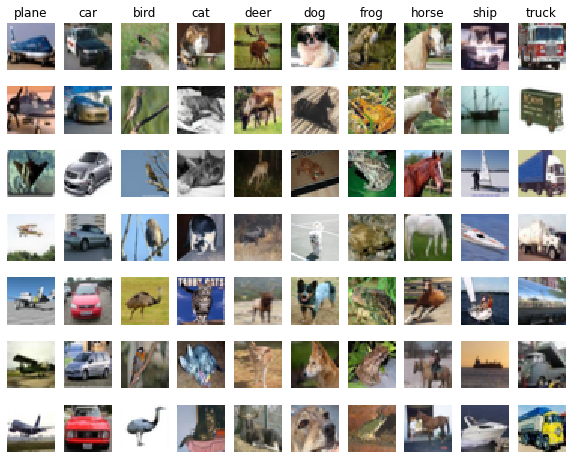

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes) # length of the list classes
samples_per_class = 7
for y, cls in enumerate(classes): # iterating over the index number and the name of the class in classes list
    idxs = np.flatnonzero(y_train == y)
    # generating random samples of size samples_per_class in idx array without replacement
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs): 
        plt_idx = i * num_classes + y + 1 # finding the postion of the plot in the overall subplot
        # creating a subplot of size [sample_per_class X num_classes] i.e [7 X 10]
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8')) # displaying the image
        plt.axis('off') # disabling the axis
        if i == 0: # 
            plt.title(cls) # title of the plot i.e class name
plt.show()

## Step - 5 (Flattening the images)

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [4]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training)) # list ranging upto 5000
X_train = X_train[mask] # selecting the first 5000 datapoints
y_train = y_train[mask] # selecting the first 5000 datapoints

num_test = 500
mask = list(range(num_test)) # list ranging upto 500
X_test = X_test[mask] # selecting the first 500 datapoints
y_test = y_test[mask] # selecting the first 500 datapoints


# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1)) # reshaping the array to 2 dimension
X_test = np.reshape(X_test, (X_test.shape[0], -1)) # reshaping the array to 2 dimension
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


## Step - 6 (Apply all possible classification algorithms)

For each algo complete the following steps with appropriate plots, diagrams and code - 
1. Discuss the intuition behind each algorithm
2. Mention pros and cons
3. Discuss about Model parameters and Hyperparameters
4. Discuss about overfitting and underfitting with relavant plots and code (Hint: Use cross validation and plot hyperparameter vs accuracy score)
5. Discuss about train and test time/space complexities
6. Measure the performance of model using various metrics and write in detail about each metric

### Model 1 - Logistic Regression

__Intution:__

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is **dichotomous**, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

__Pros:__

* This algorithm allows models to be updated easily to reflect new data, unlike decision trees or support vector machines. The update can be done using stochastic gradient descent.
* Logistic Regression proves to be very efficient when the dataset has features that are linearly separable.
* This algorithm can easily be extended to multi-class classification using a softmax classifier, this is known as Multinomial Logistic Regression.

__Cons:__

* Non linear problems can't be solved with logistic regression since it has a linear decision surface. Linearly separable data is rarely found in real world scenarios.
* It is difficult to capture complex relationships using logistic regression. More powerful and complex algorithms such as Neural Networks can easily outperform this algorithm.
* The presence of data values that deviate from the expected range in the dataset may lead to incorrect results as this algorithm is sensitive to outliers.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter('ignore')


model1 = LogisticRegression() # creating an instance

In [7]:
model1.fit(X_train, y_train) # training the model

LogisticRegression()

In [8]:
train_pred_1 = model1.predict(X_train) # prediction on the training data
train_pred_1

array([6, 1, 9, ..., 5, 4, 6])

In [9]:
test_pred_1 = model1.predict(X_test) # prediction on the testing data
test_pred_1[:25]

array([3, 9, 8, 7, 4, 6, 3, 6, 2, 1, 8, 9, 5, 2, 1, 4, 0, 7, 8, 6, 4, 2,
       0, 1, 4])

In [46]:
train_acc1 = round(accuracy_score(y_train, train_pred_1)*100, 2)
test_acc1 = round(accuracy_score(y_test, test_pred_1)*100, 2)

In [10]:
print('The accuracy score on the training data is {:.2f}'.format(accuracy_score(y_train, train_pred_1)*100))
print('The accuracy score on the test data is {:.2f}'.format(accuracy_score(y_test, test_pred_1)*100))

The accuracy score on the training data is 52.76
The accuracy score on the test data is 32.40


### Model 2 - KNN

__Intution:__

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN is a **non-parametric algorithm**, which means it does not make any assumption on underlying data. It is also called a **lazy learner** algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

__Pros:__

* K-NN is a non-parametric algorithm which means there are assumptions to be met to implement K-NN. Parametric models like linear regression has lots of assumptions to be met by data before it can be implemented
* K-NN might take some time while selecting the first hyper parameter but after that rest of the parameters are aligned to it.
* KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function

__Cons:__

* KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.
* We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.
* The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # creating an instance

In [13]:
model2.fit(X_train, y_train) # training the model

KNeighborsClassifier()

In [14]:
train_pred_2 = model2.predict(X_train)
train_pred_2

array([6, 8, 9, ..., 4, 2, 2])

In [15]:
test_pred_2 = model2.predict(X_test)
test_pred_2[:25]

array([4, 8, 8, 8, 4, 6, 6, 2, 2, 8, 0, 8, 4, 6, 4, 2, 5, 4, 8, 2, 2, 0,
       0, 2, 2])

In [44]:
train_acc2 = round(accuracy_score(y_train, train_pred_2)*100, 2)
test_acc2 = round(accuracy_score(y_test, test_pred_2)*100, 2)

In [16]:
print('The accuracy score on the training data is {:.2f}'.format(accuracy_score(y_train, train_pred_2)*100))
print('The accuracy score on the test data is {:.2f}'.format(accuracy_score(y_test, test_pred_2)*100))

The accuracy score on the training data is 45.34
The accuracy score on the test data is 27.80


### Model 3 - Decision Tree

__Intution:__

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a **tree-structured classifier**, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. In a Decision tree, there are two nodes, which are the **Decision Node** and **Leaf Node**. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches. It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

__Pros:__

* Easy to understand and interpret, perfect for visual representation. This is an example of a white box model, which closely mimics the human decision-making process.
* Can work with numerical and categorical features.
* Requires little data preprocessing: no need for one-hot encoding, dummy variables, and so on.
* Non-parametric model: no assumptions about the shape of data.

__Cons:__

* A small change in the data can cause a large change in the structure of the decision tree causing instability.
* Decision tree often involves higher time to train the model.
* Decision tree training is relatively expensive as the complexity and time has taken are more.

In [17]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier() # creating the instance

In [18]:
model3.fit(X_train, y_train) # training the model

DecisionTreeClassifier()

In [19]:
train_pred_3 = model3.predict(X_train)
train_pred_3

array([6, 9, 9, ..., 5, 4, 6])

In [20]:
test_pred_3 = model3.predict(X_test)
test_pred_3[:25]

array([2, 1, 9, 8, 6, 3, 5, 4, 2, 9, 3, 9, 4, 9, 8, 3, 5, 5, 9, 7, 0, 2,
       9, 7, 4])

In [48]:
train_acc3 = round(accuracy_score(y_train, train_pred_3)*100, 2)
test_acc3 = round(accuracy_score(y_test, test_pred_3)*100, 2)

In [21]:
print('The accuracy score on the training data is {:.2f}'.format(accuracy_score(y_train, train_pred_3)*100))
print('The accuracy score on the test data is {:.2f}'.format(accuracy_score(y_test, test_pred_3)*100))

The accuracy score on the training data is 100.00
The accuracy score on the test data is 19.20


### Model 4 - Random Forest

__Intution:__

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

**Bagging**, also known as Bootstrap Aggregation is the ensemble technique used by random forest. Bagging chooses a random sample from the data set. Hence each model is generated from the samples (Bootstrap Samples) provided by the Original Data with replacement known as **row sampling**. This step of row sampling with replacement is called **bootstrap**. Now each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models. This step which involves combining all the results and generating output based on majority voting is known as **aggregation**.


__Pros:__

* It reduces overfitting in decision trees and helps to improve the accuracy
* It is flexible to both classification and regression problems
* It works well with both categorical and continuous values
* It automates missing values present in the data
* Normalising of data is not required as it uses a rule-based approach.

__Cons:__

* It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
* It also requires much time for training as it combines a lot of decision trees to determine the class.
* Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

In [22]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier() # creating an instance

In [23]:
model4.fit(X_train, y_train) # training the model

RandomForestClassifier()

In [24]:
train_pred_4 = model4.predict(X_train)
train_pred_4

array([6, 9, 9, ..., 5, 4, 6])

In [25]:
test_pred_4 = model4.predict(X_test)
test_pred_4[:25]

array([3, 8, 8, 8, 4, 6, 5, 4, 5, 8, 8, 9, 5, 0, 9, 1, 5, 3, 8, 6, 7, 0,
       0, 1, 2])

In [49]:
train_acc4 = round(accuracy_score(y_train, train_pred_4)*100, 2)
test_acc4 = round(accuracy_score(y_test, test_pred_4)*100, 2)

In [26]:
print('The accuracy score on the training data is {:.2f}'.format(accuracy_score(y_train, train_pred_4)*100))
print('The accuracy score on the test data is {:.2f}'.format(accuracy_score(y_test, test_pred_4)*100))

The accuracy score on the training data is 100.00
The accuracy score on the test data is 36.80


### Model 5 - XGBoost

__Intution:__

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

__Pros:__

* Gradient Boosting comes with an easy to read and interpret algorithm, making most of its predictions easy to handle.
* Boosting is a resilient and robust method that prevents and cubs over-fitting quite easily
* XGBoost performs very well on medium, small, data with subgroups and structured datasets with not too many features. 

__Cons:__

* XGBoost does not perform so well on sparse and unstructured data.
* A common thing often forgotten is that Gradient Boosting is very sensitive to outliers since every classifier is forced to fix the errors in the predecessor learners. 
* The overall method is hardly scalable. This is because the estimators base their correctness on previous predictors, hence the procedure involves a lot of struggle to streamline. 

In [27]:
from xgboost import XGBClassifier

In [28]:
model5 = XGBClassifier() # creating an instance

In [29]:
model5.fit(X_train, y_train) # training the model

[19:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
train_pred_5 = model5.predict(X_train)
train_pred_5

array([6, 9, 9, ..., 5, 4, 6])

In [31]:
test_pred_5 = model5.predict(X_test)
test_pred_5[:25]

array([3, 8, 8, 0, 4, 6, 3, 6, 2, 8, 8, 1, 5, 7, 9, 8, 5, 3, 8, 6, 9, 0,
       0, 1, 2])

In [50]:
train_acc5 = round(accuracy_score(y_train, train_pred_5)*100, 2)
test_acc5 = round(accuracy_score(y_test, test_pred_5)*100, 2)

In [32]:
print('The accuracy score on the training data is {:.2f}'.format(accuracy_score(y_train, train_pred_5)*100))
print('The accuracy score on the test data is {:.2f}'.format(accuracy_score(y_test, test_pred_5)*100))

The accuracy score on the training data is 100.00
The accuracy score on the test data is 45.80


### Step - 7 (Compare all the models)

Conclude by following below mentioed steps -
1. Plot a table showing all the algorithms used and corresponding performance metrics
2. Is there any one algorithm that can be used on all the datasets? (Hint: Read about 'No Free Lunch' theorem)

In [51]:
train_acc = {'train_acc' : [train_acc1, train_acc2, train_acc3, train_acc4, train_acc5]}
test_acc = {'test_acc' : [test_acc1, test_acc2, test_acc3, test_acc4, test_acc5]}

In [53]:
import pandas as pd

In [61]:
pd.DataFrame({'Training Accuracy' : [train_acc1, train_acc2, train_acc3, train_acc4, train_acc5],
              'Testing Accuracy' : [test_acc1, test_acc2, test_acc3, test_acc4, test_acc5]}, 
             index = ['LogisticRegression', 'KNN', 'DecisonTree', 'RandomForest', 'XGBoost'])

,Training Accuracy,Testing Accuracy
LogisticRegression,52.76,32.4
KNN,45.34,27.8
DecisonTree,100.00,19.2
RandomForest,100.00,36.8
XGBoost,100.00,45.8
